# Regresion lineal simple 
+ Paquete statsmodel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../resources/python-ml-course/datasets/ads/Advertising.csv")

In [3]:
import statsmodels.formula.api as smf

El metodo empleado sera ols para crear un modelo de regresion simple:
+ formula: Relaciona las variables mediante el signo ~
+ data: datos para entrenar

Mediante el metodo fit() ajustamos un modelo mediante minimizacion de cuadrados

In [4]:
lm = smf.ols(formula="Sales~TV", data=data).fit()

In [5]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

Segun los parametros indicados tenemos el modelo predictivo
$$Sales = 7.032594 + 0.047537*TV$$

### Evaluacion de p-valores

In [6]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

Evaluando los p-valores, si planteasemos un margen aceptable del 0,05 el entregado por este modelo es 1.406300e-35 para $\alpha$ y 1.467390e-42 para $\beta$ que son muy menores al margen por lo que ambos parametros tienen importancia.

### Evaluacion de $R^2$

In [7]:
lm.rsquared

0.611875050850071

In [8]:
lm.rsquared_adj

0.6099148238341623

### Resumen de rstadisticas

In [9]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           1.47e-42
Time:                        16:54:45   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

De esta forma obtenemos todas las metricas para evaluar el modelo y podemos evaluar cada una, ademas de las ya mencionadas se destaca:
+ Gran valor y peso de la F-Statistic para este caso

Ademas se revisan nuevos como AIC y BIC que nos sirven para evaluar modelos de multiples X(variables predictoras), de esta forma evaluamos cuantos parametros son los ideales para el modelo (mientras mayor AIC y BIC mejor sera el modelo), y de ser necesario buscamos eliminar todos los parametros que sean posibles sin afectar mayormente esta metrica

### Uso del modelo

In [10]:
sales_pred = lm.predict(data["TV"])

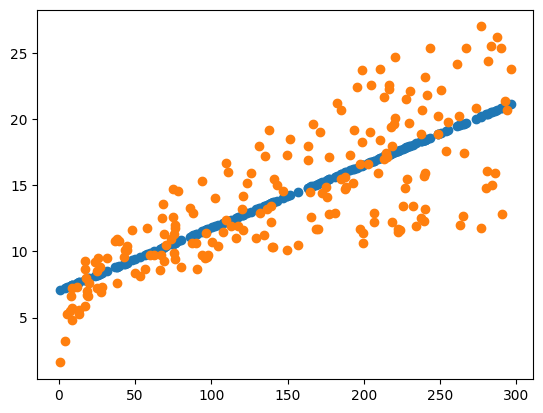

In [11]:
%matplotlib inline
plt.scatter(x=data["TV"],y=sales_pred)
plt.scatter(x=data["TV"],y=data["Sales"])

### Error de prediccion

In [12]:
errors =(data["Sales"]-sales_pred)

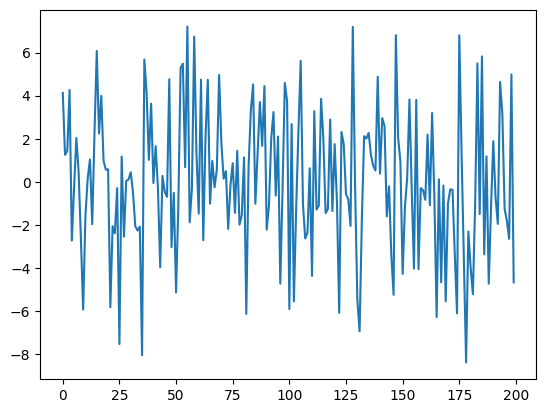

In [13]:
plt.plot(errors)

### Error estadistico Residual

In [14]:
SSD = sum(errors**2)
SSD

2102.5305831313517

In [15]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

3.258656368650463

In [16]:
sales_m = np.mean(data["Sales"])
sales_m

14.0225

In [17]:
error_m = RSE/sales_m 
error_m

0.2323876889748948

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.38598196, -6.82614689, -5.26631183, -3.70647677, -2.14664171,
        -0.58680664,  0.97302842,  2.53286348,  4.09269854,  5.65253361,
         7.21236867]),
 <BarContainer object of 10 artists>)

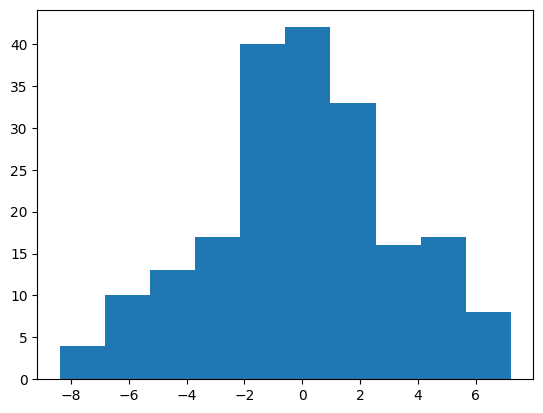

In [18]:
plt.hist(errors)

## Regresion Lineal Multiple
Opciones de modelos
+ Sales ~TV
+ Sales ~Newspaper
+ Sales ~Radio
+ Sales ~TV+Newspaper
+ Sales ~TV+Radio
+ Sales ~Newspaper+Radio
+ Sales ~TV+Newspaper+Radio

Receta dada en curso
+ Partir con modelo que contenga todas las variables
+ Analizar p-valores y establecer un margen ej 0.05
+ Eliminar la/las variables que tengan un p-valor alto que no afecte R2, AIC, BIC, etc.

Posibles caminos
+ bottom-up: Se parte de un modelo de una variable y se van añadiendo variables a X para mejorar parametros
+ top-down: Receta dada antes

#### TV+Newspaper

In [19]:
lm2 = smf.ols(formula="Sales~TV+Newspaper", data=data).fit()
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [20]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

Podemos ver que el p-value de Newspaper no es tan pequeño como TV, pero cumple con el rango autoimpuesto de 0.5

El nuevo modelo seria

$$Sales = 5.774948 + 0.046901*TV + 0.044219*Newspaper$$

In [21]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           3.95e-45
Time:                        16:54:46   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Se mejora el R2 de forma leve

In [22]:
sales_pred2 = lm2.predict(data[["TV","Newspaper"]])

In [23]:
SSD = sum((data["Sales"]-sales_pred2)**2)
SSD

1918.5618118968275

In [24]:
RSE = np.sqrt(SSD/(len(data)-3))
RSE

3.1207198602528856

In [25]:
error_m = RSE/sales_m 
error_m # mejora marginalmente

0.22255089037282122

#### TV+Radio

In [26]:
lm3 = smf.ols(formula="Sales~TV+Radio", data=data).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           4.83e-98
Time:                        16:54:46   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Podemos observar una mejora sustantiva en R2

In [27]:
sales_pred3 = lm3.predict(data[["TV","Radio"]])

In [28]:
SSD = sum((data["Sales"]-sales_pred3)**2)
SSD

556.9139800676181

In [29]:
RSE = np.sqrt(SSD/(len(data)-3))
RSE

1.6813609125080007

In [30]:
error_m = RSE/sales_m 
error_m

0.11990450436855059

#### TV+Radio+Newspaper

In [31]:
lm4 = smf.ols(formula="Sales~TV+Radio+Newspaper", data=data).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           1.58e-96
Time:                        16:54:46   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Aqui obserrvamos que el coef de Newspaper se vuelve negativo, ademas su intervalo de confianza toma el 0 y su p-valor es muy alto por lo que no aporta informacion al modelo

#### Multicolinealidad
En el modelo anterior la razon de porque las predicciones fueron peores y una columna nos indicaba que no aportaba al modelo, es por la colinealidad, esta se deriva de una correlacion entre dos $x_i$ viendo la matriz de correlacion podemos ver que son Radio y Newspaper

In [32]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Una solucion simple es seleccionar de las variables correlacionadas la columna que mas aporte evaluando los p-valores, pero es mas correcto emplear un analisis por el coeficiente VIF para analizar la correlacion de una variable con el conjunto de las otras

##### Factor inflacion de la varianza (VIF)

+ VIF = 1 : Variables no correlacionadas
+ VIF < 5 : Variables correlacionadas de forma moderada y puede estar en modelo
+ VIF > 5 : Variables altamente correlacionadas y deben desaparecer del modelo

In [33]:
# Newspaper ~ TV + Radio
lm_n = smf.ols(formula="Newspaper~TV+Radio", data=data).fit()
r2_n = lm_n.rsquared
VIF = 1/(1-r2_n)
VIF

1.1451873787239288

In [34]:
# TV ~ Newspaper + Radio
lm_tv = smf.ols(formula="TV~Newspaper+Radio", data=data).fit()
r2_tv = lm_tv.rsquared
VIF = 1/(1-r2_tv)
VIF

1.00461078493965

In [35]:
# Radio ~ Newspaper + TV
lm_r = smf.ols(formula="Radio~Newspaper+TV", data=data).fit()
r2_r = lm_r.rsquared
VIF = 1/(1-r2_r)
VIF

1.1449519171055351

Podemos concluir que newspaper y radio estan correlacionadas, mientras TV no, pero el VIF no nos da indicios de cual variable eliminar por lo que se debe evaluar solo segun las metricas de desempeño de cada modelo

## Validacion de Modelo
+ Para evitar el overfitting lo correcto es partir el dataset en 2, un conjunto para entrenamiento y otro de validacion

In [36]:
# Division sin cambiar orden
cut_index = int(len(data)*0.8)
data_train = data[:cut_index]
data_val = data[cut_index:]

In [37]:
# Division cambiando orden a partir de una dist normal
a = np.random.randn(len(data))
check = (a<0.8)
train_data = data[check]
val_data = data[~check]

In [38]:
lm_f1 = smf.ols(formula="Sales~TV+Radio", data=data_train).fit()
lm_f1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     677.3
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           6.19e-78
Time:                        16:54:46   Log-Likelihood:                -310.03
No. Observations:                 160   AIC:                             626.1
Df Residuals:                     157   BIC:                             635.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9318      0.336      8.720      0.000       2.268       3.596
TV             0.0473      0.002     30.059      0.000       0.044       0.050
Radio          0.1794      0.009     19.560      0.000       0.161       0.198
==============================================================================
Omnibus:                       52.199   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.513
Skew:                          -1.383   Prob(JB):                     3.37e-28
Kurtosis:                       6.366   Cond. No.                         421.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
lm_f2 = smf.ols(formula="Sales~TV+Radio", data=train_data).fit()
lm_f2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     725.6
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           1.12e-83
Time:                        16:54:46   Log-Likelihood:                -329.15
No. Observations:                 172   AIC:                             664.3
Df Residuals:                     169   BIC:                             673.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9794      0.319      9.333      0.000       2.349       3.610
TV             0.0465      0.001     31.387      0.000       0.044       0.049
Radio          0.1803      0.009     20.409      0.000       0.163       0.198
==============================================================================
Omnibus:                       55.953   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.566
Skew:                          -1.371   Prob(JB):                     4.05e-32
Kurtosis:                       6.557   Cond. No.                         432.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Validacion de modelos

In [40]:
sales_predf1 = lm_f1.predict(data_val)
sales_predf2 = lm_f2.predict(val_data)

In [41]:
SSD1 = sum((data_val["Sales"]-sales_predf1)**2)
SSD2 = sum((val_data["Sales"]-sales_predf2)**2)
SSD1, SSD2

(111.72355695092489, 97.5682565249896)

In [42]:
RSE1 = np.sqrt(SSD1/(len(data_val)-2-1))
RSE2 = np.sqrt(SSD2/(len(val_data)-2-1))
RSE1, RSE2

(1.737686851325129, 1.9755329055724644)

In [43]:
sales_f1m = np.mean(data_val["Sales"])
sales_f2m = np.mean(val_data["Sales"])

error1 = RSE1 / sales_f1m
error2 = RSE2 / sales_f2m

error1, error2

(0.12541947681884727, 0.1386338881103484)

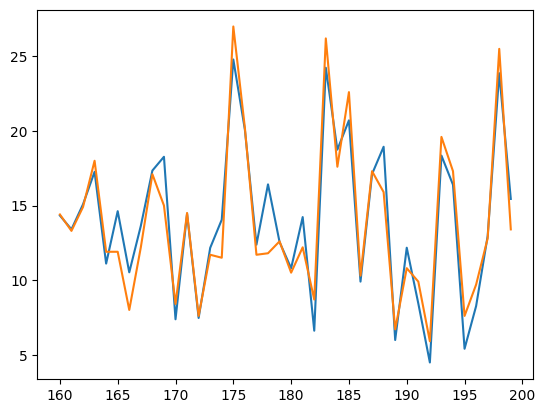

In [44]:
%matplotlib inline
plt.plot(sales_predf1)
plt.plot(data_val["Sales"])

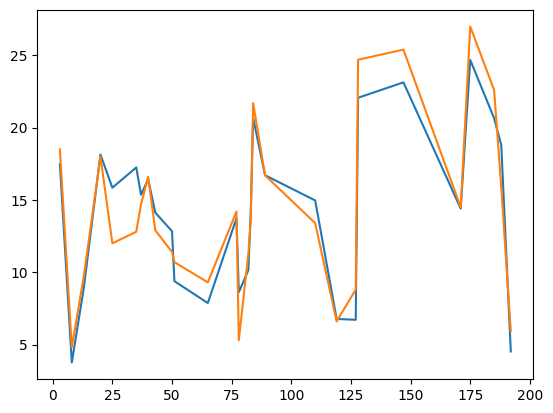

In [45]:
%matplotlib inline
plt.plot(sales_predf2)
plt.plot(val_data["Sales"])

# Regresion Lineal con Scikit-learn
+ implementa la deteccion de variables mas importantes, hacia atras o top-down, donde se espicifica solo el n° de variables

In [46]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [48]:
feature_cols = ["TV","Radio","Newspaper"]

X = data[feature_cols]
y = data["Sales"]

Separacion de dataset

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Modelo con rodas las caracteristicas

In [50]:
lmodel_1 = LinearRegression().fit(X_train,y_train)
lmodel_1.score(X_test, y_test)

0.8804533455442591

In [53]:
y_pred = lmodel_1.predict(X_test)
y_pred

array([ 8.26399107, 12.55638082,  9.89981135, 13.67940237,  8.0383353 ,
       18.21805533, 12.35733724,  7.89792059,  9.62888952, 18.49603565,
       11.4535199 , 12.0499616 , 11.35469409, 21.64822359, 22.07835212,
        8.15513865, 21.38625671, 21.49632729, 15.57900941, 15.36618827,
       20.17526496, 10.49967635, 19.27934761,  7.45259858, 13.71446966,
        8.69088274,  5.10591901, 19.48263448, 13.14311616, 14.74457364,
       16.39344929, 12.68223596, 15.24364933,  4.46538369, 20.76584081,
       18.57178905, 16.9892722 , 17.19076136,  6.4763231 , 12.01269444])

In [57]:
y_arr = y_test.to_numpy()

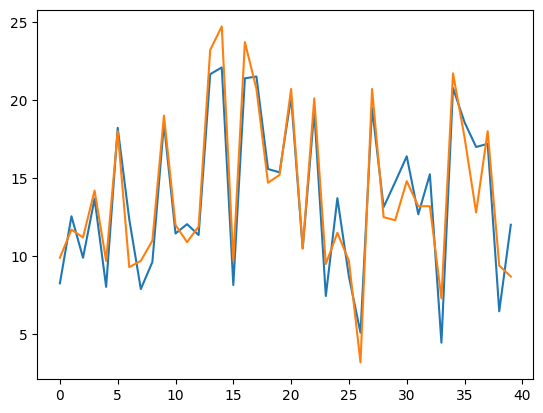

In [59]:
%matplotlib inline
plt.plot(y_pred)
plt.plot(y_arr)

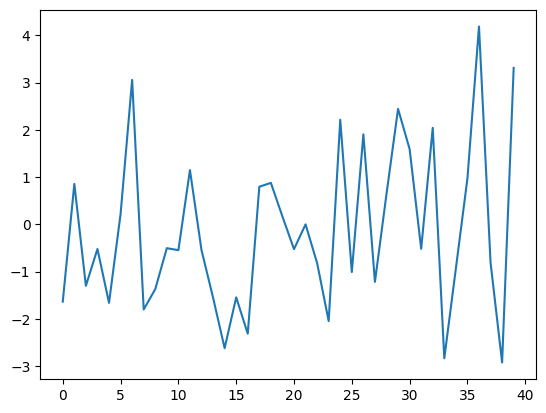

In [58]:
plt.plot(y_pred-y_arr)

## Modelo con eliminacion de caracteristicas

In [62]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=2)
selector = selector.fit(X_train, y_train)

Que variables mantuvo?

In [63]:
selector.support_

array([ True,  True, False])

In [64]:
selector.ranking_

array([1, 1, 2])

Las columnas siguen el orden ["TV","Radio","Newspaper"], por lo que podemos ver que sklearn mantiene las columnas que guardamos de forma manual con statsmodel

In [71]:
X_test2 = X_test[["TV","Radio"]]
lmodel_2 = LinearRegression().fit(X_test2,y_test)
lmodel_2.score(X_test2,y_test)

0.8873473960582475